In [1]:
# import modules/dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import linregress
import json
import seaborn as sns
from datetime import datetime,date
from datetime import date
import hvplot.pandas
import pytz
import folium
import geopandas as gpd
import sweetviz as sv

In [2]:
# import the dataset from the csv file
dogs = pd.read_csv("../Datasets/merged_dog_data.csv")


In [3]:
#show the first ten rows of your new dataframe
dogs.head(10)


,Unnamed: 0,id,organization_id,organization_id.1,url,species,age,gender,size,coat,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.2,organization_id.3,days_on_petfinder,today,adoptable_days_online
0,0,69339698,IL145,il145,https://www.petfinder.com/dog/maisy-69339698/i...,Dog,Young,Female,Large,Short,...,IL,60477,US,69339698,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
1,1,69339658,IL145,il145,https://www.petfinder.com/dog/travis-kelce-693...,Dog,Baby,Male,Medium,Short,...,IL,60477,US,69339658,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
2,2,69339553,IL145,il145,https://www.petfinder.com/dog/fat-boy-69339553...,Dog,Young,Male,Small,Long,...,IL,60477,US,69339553,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
3,3,69339397,IL145,il145,https://www.petfinder.com/dog/perdita-69339397...,Dog,Young,Female,Large,Short,...,IL,60477,US,69339397,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
4,4,69339271,IL145,il145,https://www.petfinder.com/dog/marcus-69339271/...,Dog,Young,Male,Large,Medium,...,IL,60477,US,69339271,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
5,5,69339116,IL145,il145,https://www.petfinder.com/dog/brittany-spears-...,Dog,Young,Female,Medium,Curly,...,IL,60477,US,69339116,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
6,6,69339039,IL145,il145,https://www.petfinder.com/dog/jojo-69339039/il...,Dog,Young,Female,Large,Curly,...,IL,60477,US,69339039,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
7,7,69339013,IL145,il145,https://www.petfinder.com/dog/maverick-in-fost...,Dog,Young,Male,Large,Medium,...,IL,60477,US,69339013,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
8,8,69338962,IL145,il145,https://www.petfinder.com/dog/cleo-69338962/il...,Dog,Baby,Female,Medium,Medium,...,IL,60477,US,69338962,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
9,9,69338238,WI81,wi81,https://www.petfinder.com/dog/ripley-69338238/...,Dog,Young,Male,Small,Medium,...,WI,53186,US,69338238,dog,WI81,wi81,0.0,2023-10-17 21:42:51.576571-05:00,0


In [4]:
# show the counts of each row
dogs.count()

Unnamed: 0                  8000
id                          8000
organization_id             8000
organization_id.1           8000
url                         8000
species                     8000
age                         8000
gender                      8000
size                        8000
coat                        2836
tags                        8000
name                        8000
description                 6725
organization_animal_id      4566
photos                      8000
status                      8000
status_changed_at           8000
published_at                8000
distance                    8000
breeds.primary              8000
breeds.secondary            3048
breeds.mixed                8000
breeds.unknown              8000
colors.primary              3470
colors.secondary            1839
colors.tertiary              202
attributes.special_needs    8000
attributes.shots_current    8000
environment.children        3112
environment.dogs            4098
environmen

In [17]:
# drop duplicate records with the same id
dogs.drop_duplicates(subset=['id'],inplace=True)
dogs.drop('Unnamed: 0', axis=1, inplace=True)
dogs.id.count()

7934

In [18]:
# separate the dogs by adopted vs adoptable
adopted_dogs =  dogs[dogs["status"] == "adopted"]
adopted_dogs

,id,organization_id,organization_id.1,url,species,age,gender,size,coat,tags,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.2,organization_id.3,days_on_petfinder,today,adoptable_days_online
4000,69340177,IL145,il145,https://www.petfinder.com/dog/splatter-6934017...,Dog,Baby,Male,Medium,Short,[],...,IL,60477,US,69340177,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
4001,69340121,IL145,il145,https://www.petfinder.com/dog/cruze-69340121/i...,Dog,Baby,Male,Medium,Short,[],...,IL,60477,US,69340121,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
4002,69338995,IL976,il976,https://www.petfinder.com/dog/y10f-parcheesi-6...,Dog,Baby,Female,Medium,NaN,[],...,IL,60136,US,69338995,dog,IL976,il976,0.0,2023-10-17 21:42:51.576571-05:00,0
4003,69337958,WI542,wi542,https://www.petfinder.com/dog/andie-69337958/w...,Dog,Baby,Female,Small,NaN,[],...,WI,53168,US,69337958,dog,WI542,wi542,0.0,2023-10-17 21:42:51.576571-05:00,0
4004,69337131,IL81,il81,https://www.petfinder.com/dog/benji-69337131/i...,Dog,Baby,Male,Medium,NaN,[],...,IL,60135,US,69337131,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,66447254,IL81,il81,https://www.petfinder.com/dog/fergie-66447254/...,Dog,Adult,Female,Medium,NaN,[],...,IL,60135,US,66447254,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7996,66447260,IL81,il81,https://www.petfinder.com/dog/06-0617-66447260...,Dog,Adult,Male,Medium,NaN,[],...,IL,60135,US,66447260,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7997,66447266,IL81,il81,https://www.petfinder.com/dog/emmitt-66447266/...,Dog,Senior,Male,Medium,NaN,[],...,IL,60135,US,66447266,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7998,66447273,IL81,il81,https://www.petfinder.com/dog/bella-66447273/i...,Dog,Adult,Female,Medium,NaN,[],...,IL,60135,US,66447273,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56


In [19]:
adoptable_dogs =  dogs[dogs["status"] == "adoptable"]
adoptable_dogs

,id,organization_id,organization_id.1,url,species,age,gender,size,coat,tags,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.2,organization_id.3,days_on_petfinder,today,adoptable_days_online
0,69339698,IL145,il145,https://www.petfinder.com/dog/maisy-69339698/i...,Dog,Young,Female,Large,Short,[],...,IL,60477,US,69339698,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
1,69339658,IL145,il145,https://www.petfinder.com/dog/travis-kelce-693...,Dog,Baby,Male,Medium,Short,[],...,IL,60477,US,69339658,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
2,69339553,IL145,il145,https://www.petfinder.com/dog/fat-boy-69339553...,Dog,Young,Male,Small,Long,[],...,IL,60477,US,69339553,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
3,69339397,IL145,il145,https://www.petfinder.com/dog/perdita-69339397...,Dog,Young,Female,Large,Short,[],...,IL,60477,US,69339397,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
4,69339271,IL145,il145,https://www.petfinder.com/dog/marcus-69339271/...,Dog,Young,Male,Large,Medium,[],...,IL,60477,US,69339271,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,60267962,IL979,il979,https://www.petfinder.com/dog/charlotte-aka-ch...,Dog,Adult,Female,Medium,Short,"['Friendly', 'Playful', 'Affectionate', 'Curio...",...,IL,60439,US,60267962,dog,IL979,il979,143.0,2023-10-17 21:42:51.576571-05:00,230
3996,60261648,IL267,il267,https://www.petfinder.com/dog/grady-60261648/i...,Dog,Baby,Male,Medium,NaN,[],...,IL,60185,US,60261648,dog,IL267,il267,0.0,2023-10-17 21:42:51.576571-05:00,230
3997,60194278,IL513,il513,https://www.petfinder.com/dog/becky-60194278/i...,Dog,Young,Female,Large,Short,[],...,IL,60061,US,60194278,dog,IL513,il513,0.0,2023-10-17 21:42:51.576571-05:00,232
3998,60193689,IL72,il72,https://www.petfinder.com/dog/janis-60193689/i...,Dog,Young,Female,Medium,NaN,[],...,IL,60614,US,60193689,dog,IL72,il72,0.0,2023-10-17 21:42:51.576571-05:00,232


In [23]:
# convert published at and status changed at to pandas datetime objects
dogs['published_at'] = pd.to_datetime(dogs['published_at'])
dogs['status_changed_at'] = pd.to_datetime(dogs['status_changed_at'])

dogs['days_on_petfinder'] = (dogs['status_changed_at'] - dogs['published_at']).dt.days
dogs['days_on_petfinder'] = dogs['days_on_petfinder'].round()

today = datetime.now()

dogs['today']= datetime.now()

central_timezone = pytz.timezone('US/Central')
aware_datetime = today.astimezone(central_timezone)
aware_datetime

dogs['today'] = aware_datetime

dogs['adoptable_days_online'] =(dogs['today'] - dogs['published_at']).dt.days

In [45]:
adopted_dogs_breedcount = adopted_dogs["breeds.primary"].value_counts()
adoptable_dogs_breedcount = adoptable_dogs["breeds.primary"].value_counts()

In [46]:
adoptable_dogs_breedcount

breeds.primary
Pit Bull Terrier       537
Mixed Breed            461
Labrador Retriever     310
Chihuahua              190
German Shepherd Dog    178
                      ... 
Presa Canario            1
Norwegian Elkhound       1
Samoyed                  1
Akbash                   1
Neapolitan Mastiff       1
Name: count, Length: 153, dtype: int64

In [47]:
adopted_dogs_breedcount

breeds.primary
Labrador Retriever                   394
Chihuahua                            335
Mixed Breed                          245
Terrier                              217
German Shepherd Dog                  174
                                    ... 
Xoloitzcuintli / Mexican Hairless      1
Whippet                                1
Sheep Dog                              1
Miniature Bull Terrier                 1
Leonberger                             1
Name: count, Length: 156, dtype: int64

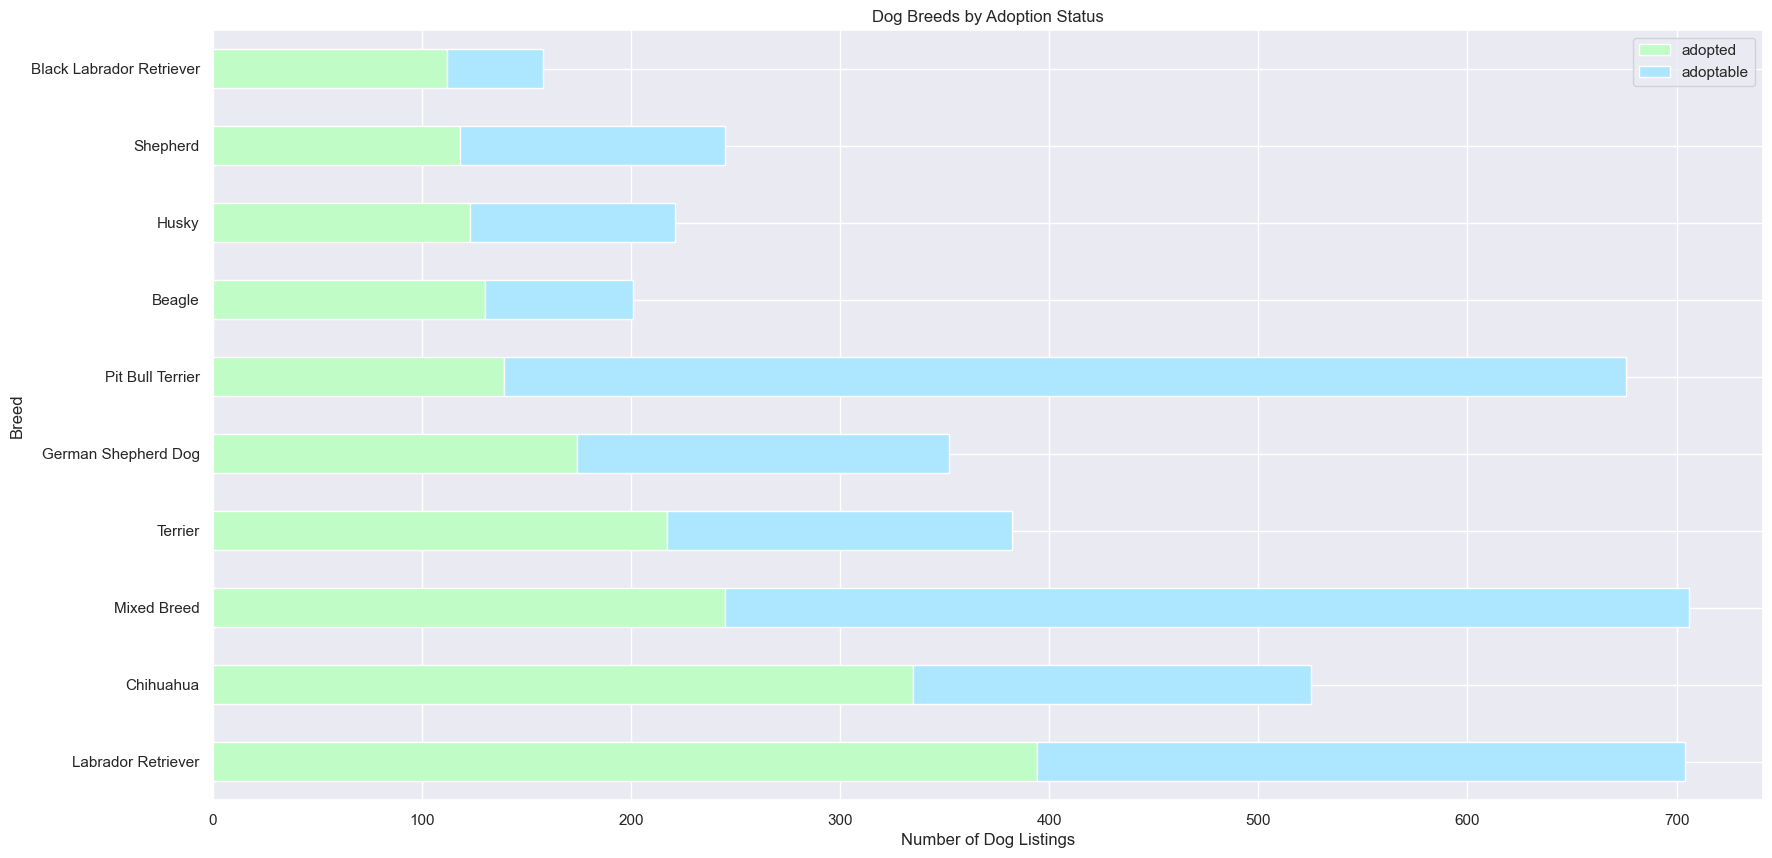

In [83]:

adopted_dogs_breedcount = adopted_dogs["breeds.primary"].value_counts()
adoptable_dogs_breedcount = adoptable_dogs["breeds.primary"].value_counts()

joint_breed_count = pd.concat([adopted_dogs_breedcount, adoptable_dogs_breedcount], axis=1, keys=['adopted','adoptable'])
joint_breed_count = joint_breed_count.fillna(0)
# adoptable_dogs_breedcount[:10].plot(kind='barh', color='red', title='Most Common Dog Breed Listings', ylabel='Dog Breeds', xlabel='Number of Dog Listings on Petfinder')
# adopted_dogs_breedcount[:10].plot(kind='barh', color='black', title='Most Common Dog Breed Listings', ylabel='Dog Breeds', xlabel='Number of Dog Listings on Petfinder')

figure = joint_breed_count[:10].plot.barh(stacked=True, title='Dog Breeds by Adoption Status', xlabel='Number of Dog Listings', ylabel='Breed', color=['#bffcc6', '#ace7ff'], legend=True)
plt.savefig('dog_breeds_by_adoption_stat.png')
plt.show()







In [84]:
# most popular names
names_counted = dogs['name'].value_counts()
names_counted

name
Bella                 27
Max                   26
Ace                   22
Molly                 22
Daisy                 21
                      ..
Jane Porter            1
Lyanna                 1
Neve                   1
Dino the Dinosaur      1
06-0617                1
Name: count, Length: 4766, dtype: int64

In [85]:
names_counted.describe()

count    4766.000000
mean        1.664708
std         1.932122
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        27.000000
Name: count, dtype: float64

<Axes: title={'center': 'Distribution of Name Counts'}, ylabel='Frequency'>

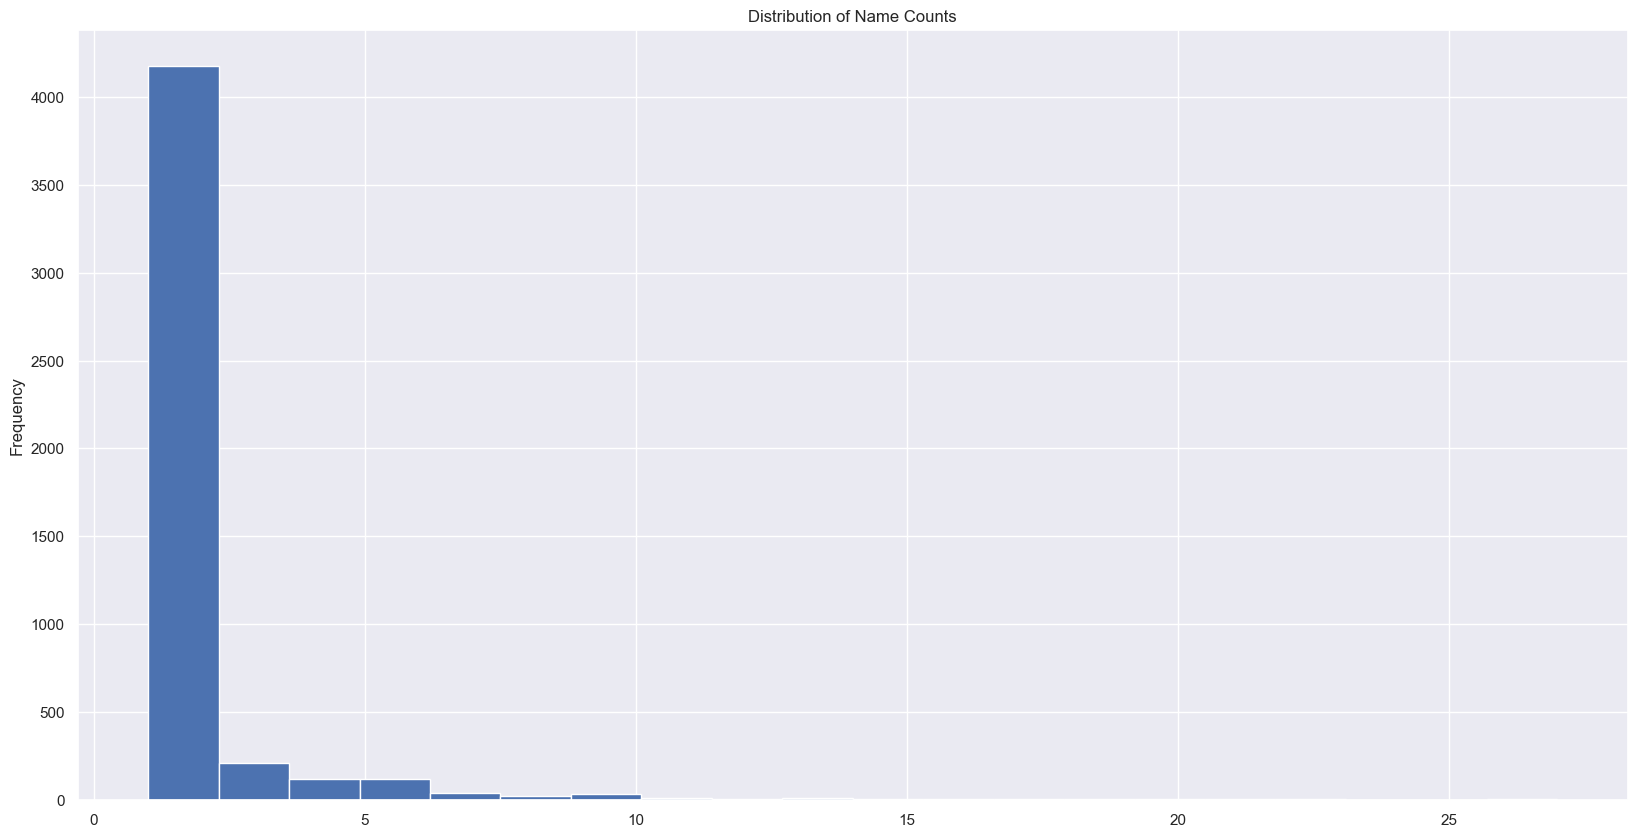

In [86]:
names_counted.plot(kind='hist', bins=20, title='Distribution of Name Counts')

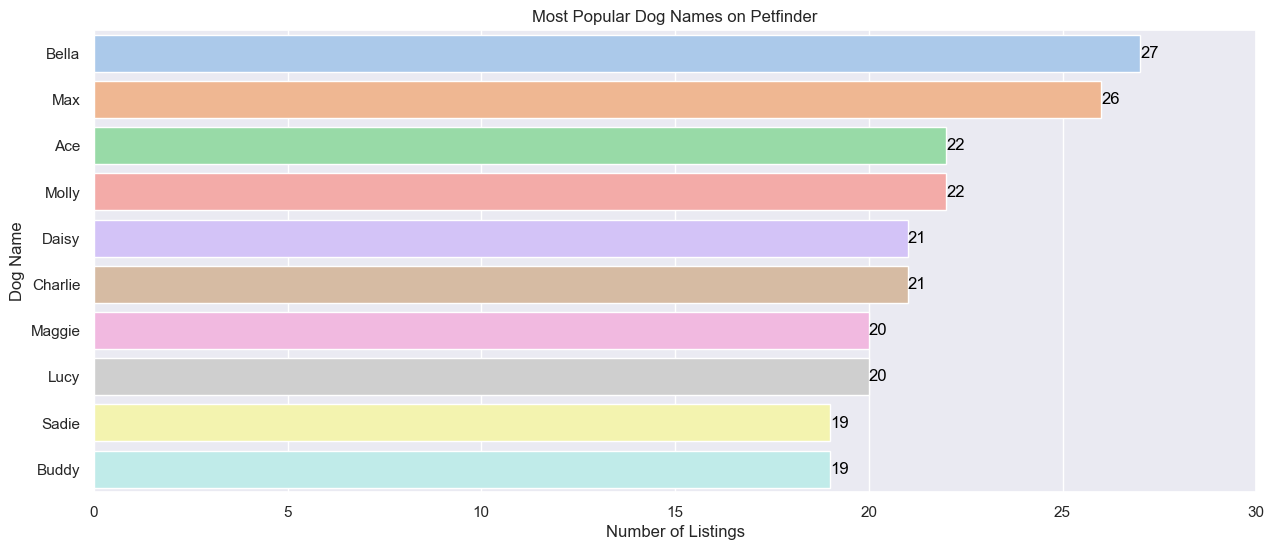

In [87]:
top_10_names = names_counted[:10]
# top_10_names = pd.Series(top_10_names)
# color_counts = dogs['colors.primary'].value_counts()
# Create a horizontal bar chart showing percentages
plt.figure(figsize=(15, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=top_10_names, y=top_10_names.index,  palette='pastel')

plt.ylabel('Dog Name')
plt.xlabel('Number of Listings')
plt.title('Most Popular Dog Names on Petfinder')
plt.xlim(right=30)
# # Annotate the bars with percentage values
for i, v in enumerate(top_10_names):
    ax.text(v, i, f'{v:.0f}', color='black', va='center')

plt.savefig('top_10_dog_names_barchart.png')
plt.show()